# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# **Load and Explore the Dataset**

In [23]:
# Load dataset
file_path = r"C:\Users\Anil Reddy\Desktop\Assignment\ML & AI\fraud_detection_results.csv"
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Quick statistics of numerical columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   amount             float64
 2   isFraud            int64  
 3   isFlaggedFraud     int64  
 4   type_CASH_OUT      bool   
 5   type_DEBIT         bool   
 6   type_PAYMENT       bool   
 7   type_TRANSFER      bool   
 8   isFraud_pred       int64  
 9   fraud_probability  float64
dtypes: bool(4), float64(2), int64(4)
memory usage: 315.5 MB
None
   step    amount  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0     1   9839.64        0               0          False       False   
1     1   1864.28        0               0          False       False   
2     1    181.00        1               0          False       False   
3     1    181.00        1               0           True       False   
4     1  11668.14        0               0          False       False   

In [31]:
data.columns

Index(['step', 'amount', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'isFraud_pred',
       'fraud_probability'],
      dtype='object')

# **Preprocessing the Data**

***Drop irrelevant columns***

In [33]:
# data = data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest'], axis=1)

***Handle categorical data***

In [37]:
# data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [39]:
data.columns

Index(['step', 'amount', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'isFraud_pred',
       'fraud_probability'],
      dtype='object')

***Handle class imbalance***

In [41]:
from imblearn.over_sampling import SMOTE

X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution
print(y_resampled.value_counts())


isFraud
0    6354407
1    6354407
Name: count, dtype: int64


***Scale the features***

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


# **Train-Test Split**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (8896169, 9)
Test set size: (3812645, 9)


# **Train a Machine Learning Model**

***Logistic Regression Model***

In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

# **Model Evaluation**

***Predictions and Confusion Matrix***

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1767079  139244]
 [ 210531 1695791]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91   1906323
           1       0.92      0.89      0.91   1906322

    accuracy                           0.91   3812645
   macro avg       0.91      0.91      0.91   3812645
weighted avg       0.91      0.91      0.91   3812645



***ROC-AUC Score and Curve***

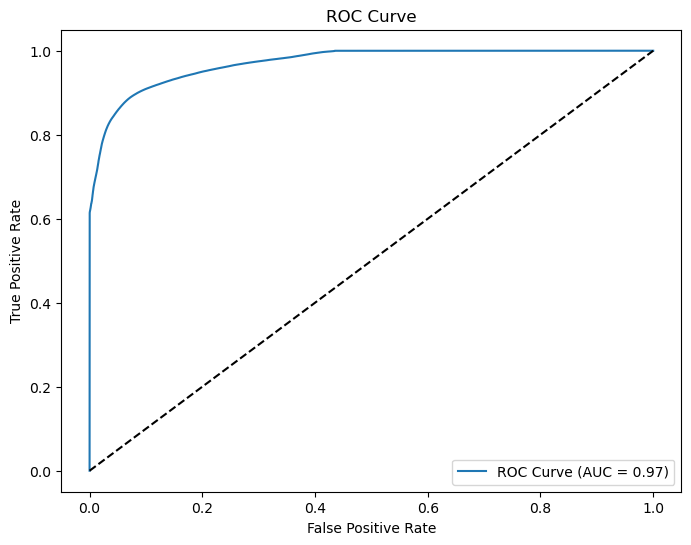

In [51]:
# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


***Precision-Recall Curve***

C:\Users\Anil Reddy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


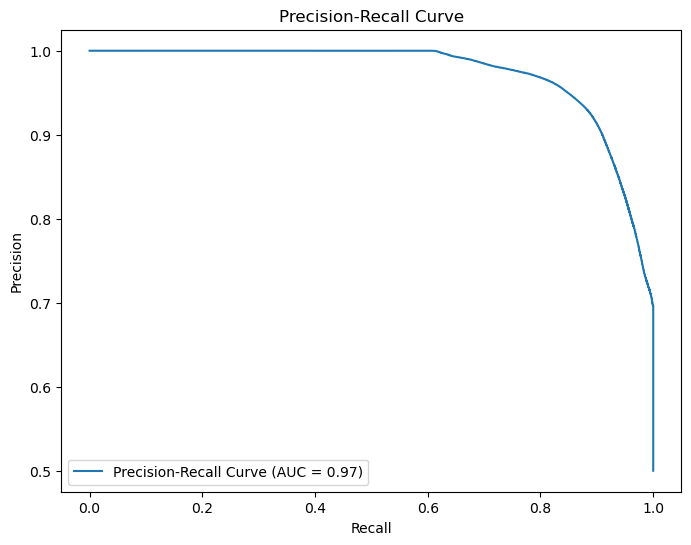

In [53]:
# Compute Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# **Prepare the Data for Tableau**

***Export Preprocessed Dataset***

In [55]:
print(f"Number of unique rows in X_scaled: {len(pd.DataFrame(X_scaled).drop_duplicates())}")


Number of unique rows in X_scaled: 12643306


In [57]:
print(f"Indexes in data: {data.index}")
print(f"Indexes in X_scaled: {len(X_scaled)}")


Indexes in data: RangeIndex(start=0, stop=6362620, step=1)
Indexes in X_scaled: 12708814


In [59]:
X_scaled = X_scaled[:len(data)]  # Truncate X_scaled to match the original dataset


In [61]:
print(f"Length of data after alignment: {len(data)}")
print(f"Length of X_scaled after alignment: {len(X_scaled)}")


Length of data after alignment: 6362620
Length of X_scaled after alignment: 6362620


In [63]:
# Add predictions to the dataset
data['isFraud_pred'] = model.predict(X_scaled)
data['fraud_probability'] = model.predict_proba(X_scaled)[:, 1]

# Save the updated dataset
data.to_csv('fraud_detection_results.csv', index=False)


***Model Metrics (Confusion Matrix and Precision-Recall Curve)***

In [65]:
# Confusion matrix data
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
cm_df.to_csv('confusion_matrix.csv')

# Precision-recall data
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_df = pd.DataFrame({'Precision': precision, 'Recall': recall})
pr_df.to_csv('precision_recall_curve.csv')
